In [70]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [73]:
def thresholding(f, L):
    # create a new image with zeros
    f_tr = np.ones(f.shape).astype(np.uint8)
    # setting to 1 the pixels above the threshold
    f_tr[np.where(f < L)] = 0
    return f_tr

def otsu_threshold(img, max_L):
    
    M = np.product(img.shape)
    min_var = []
    hist_t,_ = np.histogram(img, bins=256, range=(0,256))
    
    img_t = thresholding(img, 0)
    
    for L in np.arange(1, max_L):
        img_ti = thresholding(img, L)
        # computing weights
        w_a = np.sum(hist_t[:L])/float(M)
        w_b = np.sum(hist_t[L:])/float(M)
        # computing variances
        sig_a = np.var(img[np.where(img_ti == 0)])
        sig_b = np.var(img[np.where(img_ti == 1)])
        
        min_var = min_var + [w_a*sig_a + w_b*sig_b]
        
    img_t = thresholding(img, np.argmin(min_var))
    
    return img_t, np.argmin(min_var)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

23.853956718014707


Text(0.5, 1.0, 'threshholded image')

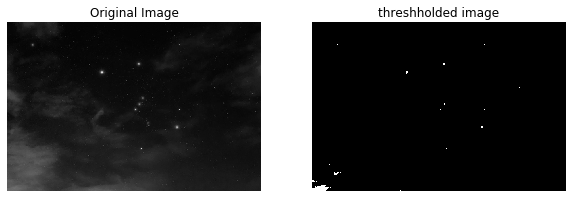

In [83]:
img = imageio.imread('images\Orion\photo5.jpg')
img_gray = rgb2gray(img)
m = np.mean(img_gray)
print(m)
img_o = thresholding(img_gray,m+70)


plt.figure(figsize=(10,15))
plt.subplot(221); plt.imshow(img_gray, cmap="gray"); plt.axis('off'); plt.title('Original Image')
plt.subplot(222); plt.imshow(img_o, cmap="gray"); plt.axis('off'); plt.title('threshholded image')